📊 Loading data labelling study results...
✅ Loaded seed 42, size 0.1: Accuracy=0.556, Precision=0.535
✅ Loaded seed 42, size 0.2: Accuracy=0.674, Precision=0.664
✅ Loaded seed 42, size 0.3: Accuracy=0.650, Precision=0.663
✅ Loaded seed 42, size 0.4: Accuracy=0.650, Precision=0.655
✅ Loaded seed 42, size 0.5: Accuracy=0.670, Precision=0.677
✅ Loaded seed 42, size 0.6: Accuracy=0.705, Precision=0.728
✅ Loaded seed 42, size 0.7: Accuracy=0.720, Precision=0.726
✅ Loaded seed 42, size 0.8: Accuracy=0.672, Precision=0.687
✅ Loaded seed 42, size 0.9: Accuracy=0.703, Precision=0.716
✅ Loaded seed 42, size 1.0: Accuracy=0.722, Precision=0.708
✅ Loaded seed 43, size 0.1: Accuracy=0.571, Precision=0.557
✅ Loaded seed 43, size 0.2: Accuracy=0.653, Precision=0.628
✅ Loaded seed 43, size 0.3: Accuracy=0.653, Precision=0.673
✅ Loaded seed 43, size 0.4: Accuracy=0.656, Precision=0.640
✅ Loaded seed 43, size 0.5: Accuracy=0.665, Precision=0.726
✅ Loaded seed 43, size 0.6: Accuracy=0.653, Precision=0.66

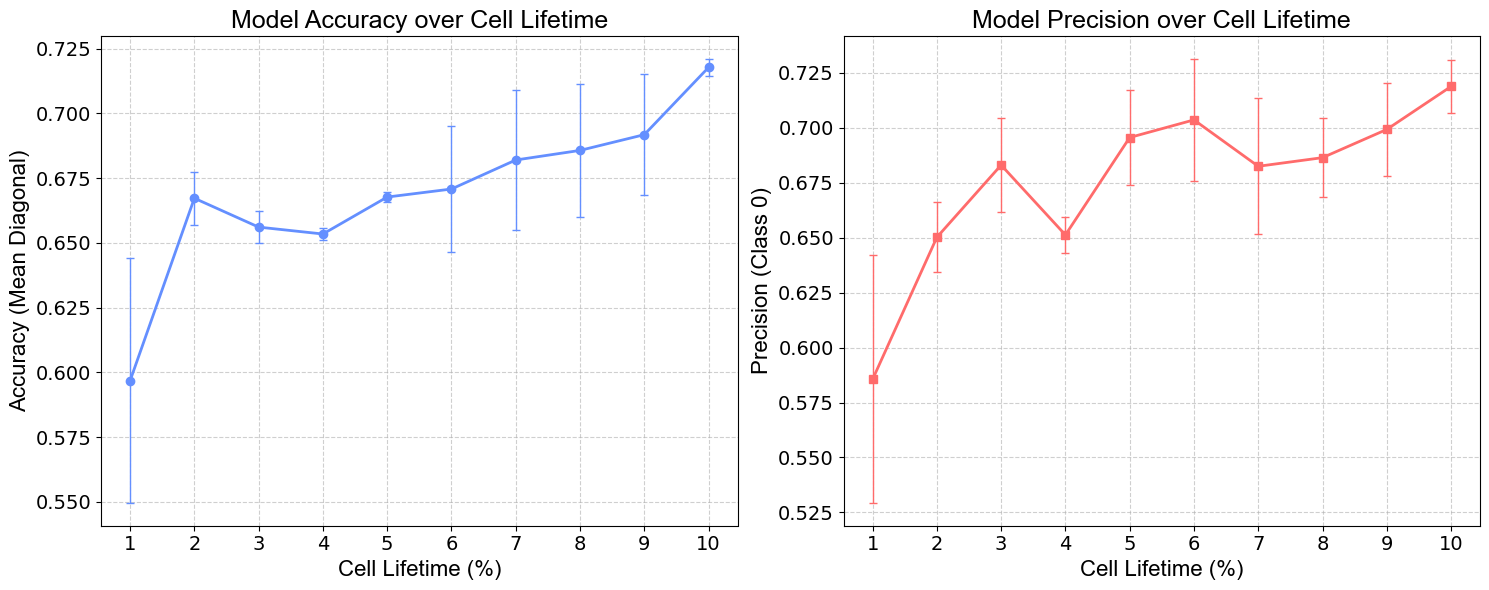


📊 Summary Statistics:
Time Point | Accuracy (Mean±Std) | Precision (Mean±Std)
------------------------------------------------------------

✅ Data labelling study analysis complete!


In [37]:
import numpy as np
import matplotlib.pyplot as plt
import os
import json

# Configuration
seeds = [42, 43, 44] #43
data_size = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]  # 0 to 10 (0%, 10%, ..., 100%)
results_base_dir = "../../results"

# Storage for results
all_accuracies = []  # Shape: (seeds, time_points)
all_precisions = []  # Shape: (seeds, time_points)

print("📊 Loading data labelling study results...")

# Load results for each seed and time point
for seed in seeds:
    seed_accuracies = []
    seed_precisions = []
    
    for size in data_size:
        # Construct folder name based on your pattern
        folder_name = f"data_size_study{size}_s1_ep35_lr5_la1_seed{seed}_ldim2_s2_lr6_la4_lc1_lcon8"
        folder_path = os.path.join(results_base_dir, folder_name)
        
        # Look for confusion matrix files (they should be saved at the end of training)
        confusion_files = [f for f in os.listdir(folder_path) if f.startswith('confusion_matrix_values_epoch_') and f.endswith('.npy')]
        
        if confusion_files:
            # Get the latest confusion matrix (highest epoch number)
            latest_file = max(confusion_files, key=lambda x: int(x.split('_')[-1].split('.')[0]))
            cm_path = os.path.join(folder_path, latest_file)
            
            # Load confusion matrix
            cm = np.load(cm_path)
            
            # Calculate metrics
            mean_diagonal = np.mean(np.diag(cm))  # Accuracy
            precision = cm[0,0] / (cm[0,0] + cm[1,0]) if (cm[0,0] + cm[1,0]) > 0 else 0.0
            
            seed_accuracies.append(mean_diagonal)
            seed_precisions.append(precision)
            
            print(f"✅ Loaded seed {seed}, size {size}: Accuracy={mean_diagonal:.3f}, Precision={precision:.3f}")
        else:
            print(f"❌ No confusion matrix found for seed {seed}, time point {size}")
            seed_accuracies.append(np.nan)
            seed_precisions.append(np.nan)
    
    all_accuracies.append(seed_accuracies)
    all_precisions.append(seed_precisions)

# Convert to numpy arrays
all_accuracies = np.array(all_accuracies)  # Shape: (3, 11)
all_precisions = np.array(all_precisions)  # Shape: (3, 11)

# Calculate mean and std across seeds
mean_accuracies = np.nanmean(all_accuracies, axis=0)
std_accuracies = np.nanstd(all_accuracies, axis=0)
mean_precisions = np.nanmean(all_precisions, axis=0)
std_precisions = np.nanstd(all_precisions, axis=0)

print(f"\n📈 Creating plots...")

# Create the plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Convert time points to percentages for x-axis labels
data_percentages = [size * 10 for size in data_size]  # 0%, 10%, 20%, ..., 100%
#time_percentages = [tp * 10 for tp in time_points]  # 0%, 10%, 20%, ..., 100%

# Plot 1: Accuracy over time
ax1.errorbar(data_percentages, mean_accuracies, yerr=std_accuracies, 
             color='#648FFF', linewidth=2, marker='o', markersize=6, 
             capsize=3, capthick=1, elinewidth=1, 
             markerfacecolor='#648FFF', markeredgecolor='#648FFF')

ax1.set_xlabel("Cell Lifetime (%)", fontsize=16, fontname="Arial")
ax1.set_ylabel("Accuracy (Mean Diagonal)", fontsize=16, fontname="Arial")
ax1.set_title("Model Accuracy over Cell Lifetime", fontsize=18, fontname="Arial")
ax1.set_xticks(data_percentages)
ax1.tick_params(axis='both', labelsize=14)
ax1.grid(True, linestyle="--", alpha=0.6)

# Plot 2: Precision over time
ax2.errorbar(data_percentages, mean_precisions, yerr=std_precisions, 
             color='#FF6B6B', linewidth=2, marker='s', markersize=6, 
             capsize=3, capthick=1, elinewidth=1, 
             markerfacecolor='#FF6B6B', markeredgecolor='#FF6B6B')

ax2.set_xlabel("Cell Lifetime (%)", fontsize=16, fontname="Arial")
ax2.set_ylabel("Precision (Class 0)", fontsize=16, fontname="Arial")
ax2.set_title("Model Precision over Cell Lifetime", fontsize=18, fontname="Arial")
ax2.set_xticks(data_percentages)
ax2.tick_params(axis='both', labelsize=14)
ax2.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n📊 Summary Statistics:")
print("=" * 60)
print("Time Point | Accuracy (Mean±Std) | Precision (Mean±Std)")
print("-" * 60)
# Save results
results_summary = {
    'time_points': data_percentages,
    'mean_accuracies': mean_accuracies.tolist(),
    'std_accuracies': std_accuracies.tolist(),
    'mean_precisions': mean_precisions.tolist(),
    'std_precisions': std_precisions.tolist(),
    'all_accuracies': all_accuracies.tolist(),
    'all_precisions': all_precisions.tolist()
}

# Uncomment to save results
# np.save('temporal_study_results.npy', results_summary)
# print(f"\n💾 Results saved to temporal_study_results.npy")

print(f"\n✅ Data labelling study analysis complete!")

In [21]:
np.load("/Users/inescunha/Documents/GitHub/AI4CellFate/results/data_size_study0.9_s1_ep35_lr5_la1_seed44_ldim2_s2_lr6_la4_lc1_lcon8/confusion_matrix_values_epoch_50.npy")

array([[0.71551724, 0.28448276],
       [0.28888889, 0.71111111]])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


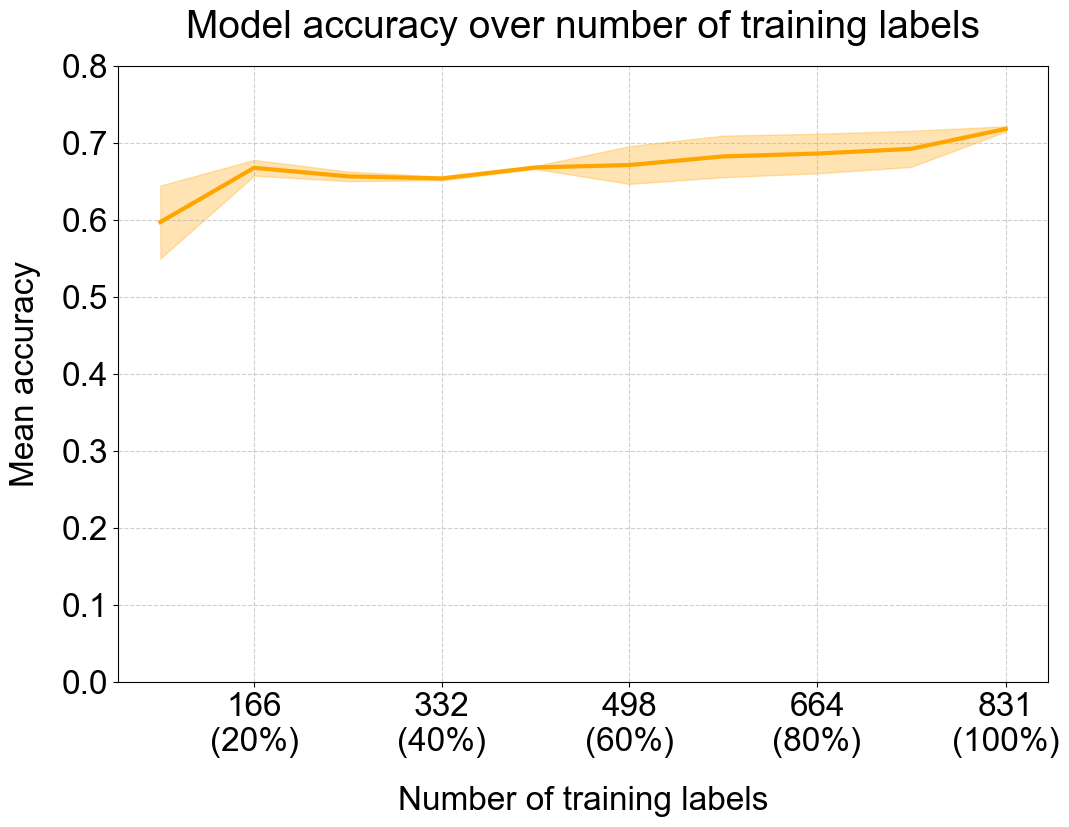

In [ ]:
# Calculate actual number of training labels (831 * size fractions)
size_fractions = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
train_labels_count = [int(831 * size) for size in size_fractions]

# Create x-axis labels with both count and percentage (only show even percentages)
x_labels = []
for i, (count, frac) in enumerate(zip(train_labels_count, size_fractions)):
    percentage = int(frac * 100)
    if percentage % 20 == 0:  # Show labels for 20%, 40%, 60%, 80%, 100%
        x_labels.append(f"{count}\n({percentage}%)")
    else:
        x_labels.append(f"{count}")  # Only show the count for odd percentages

# Define which x-tick positions to show (only even percentages)
even_indices = [i for i, frac in enumerate(size_fractions) if int(frac * 100) % 20 == 0]
even_positions = [train_labels_count[i] for i in even_indices]
even_labels = [x_labels[i] for i in even_indices]

# Plot
plt.figure(figsize=(12, 8))  # Increased figure size to accommodate labels

# Precision
# plt.plot(train_labels_count, mean_precisions, color='purple', linewidth=2, label='Precision')
# plt.fill_between(train_labels_count, mean_precisions - std_precisions, mean_precisions + std_precisions,
#                  color='purple', alpha=0.3)

# # Accuracy (purple)
plt.plot(train_labels_count, mean_accuracies, color='orange', linewidth=3, label='Accuracy')
plt.fill_between(train_labels_count, mean_accuracies - std_accuracies, 
                 mean_accuracies + std_accuracies, color='orange', alpha=0.3)


# Formatting
plt.xlabel("Number of training labels", fontsize=24, fontname="Arial", labelpad=20)  # Add padding below x-axis
plt.ylabel("Mean accuracy", fontsize=24, fontname="Arial", labelpad=15)  # Add padding to left of y-axis
plt.title("Model accuracy over number of training labels", fontsize=28, fontname="Arial", pad=20)  # Add padding above title
plt.xticks(even_positions, even_labels, fontsize=24, fontname="Arial", rotation=0)  # Show only even percentage labels
plt.yticks(fontsize=24, fontname="Arial")
plt.ylim(0.0, 0.8)  # Set y-axis range
#plt.legend(fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)

# Adjust layout to prevent clipping and add more space
#plt.tight_layout()
#plt.subplots_adjust(bottom=0.15)  # Add extra space at bottom for x-axis labels

# Save the figure with high quality
#plt.savefig("data_labelling_study.eps", dpi=300, bbox_inches="tight")
plt.show()

In [66]:
import numpy as np
from sklearn.model_selection import train_test_split
from src.preprocessing.preprocessing_functions import augment_dataset, augmentations

print("📊 Loading data labelling study results...")
size = 0.6

x_train = np.load('../../data/images/train_no_aug_time_norm.npy')[:,0,:,:] # FIRST FRAME ONLY
y_train = np.load('../../data/labels/train_labels.npy')  
x_test = np.load('../../data/images/test_time_norm.npy')[:,0,:,:] # FIRST FRAME ONLY
y_test = np.load('../../data/labels/test_labels.npy')

x_all = np.concatenate([x_train, x_test], axis=0)
y_all = np.concatenate([y_train, y_test], axis=0)

# First split: 60% train, 40% temp (which will become 20% val + 20% test)
x_train_new, x_temp, y_train_new, y_temp = train_test_split(
    x_all, y_all, 
    test_size=0.4,  # 40% for temp (val + test)
    random_state=42, 
    stratify=y_all  # Keep class balance
)

# Second split: Split the 40% temp into 20% val + 20% test
x_val, x_test_new, y_val, y_test_new = train_test_split(
    x_temp, y_temp,
    test_size=0.5,  # 50% of 40% = 20% of total
    random_state=42,
    stratify=y_temp  # Keep class balance
)

#### NOW WE HAVE x_train_new, x_val, x_test_new, y_train_new, y_val, y_test_new ####
np.random.seed(42)
less_indexes = np.random.choice(np.arange(len(y_train_new)), int(size * len(y_train_new)), replace=False)

smaller_x_train = x_train_new[np.sort(less_indexes)]
smaller_y_train = y_train_new[np.sort(less_indexes)]

print(f"Smaller train set shape: {smaller_x_train.shape}")
print(f"Smaller train labels shape: {smaller_y_train.shape}")

augmented_x_train, augmented_y_train = augment_dataset(
                smaller_x_train, 
                smaller_y_train, 
                augmentations, 
                augment_times=5,
                seed=42
            )

📊 Loading data labelling study results...
Smaller train set shape: (498, 20, 20)
Smaller train labels shape: (498,)
Balancing Class 0: 2490 → 498 samples (preserving augmentation structure)
✅ Balanced Class 0: 498 samples with equal augmentation representation


In [61]:
import sys
import os
sys.path.append(os.path.abspath("../..")) 
from src.models import Encoder, Decoder, Discriminator, mlp_classifier

config = {
    'batch_size': 30,
    'epochs': 50,
    'learning_rate': 0.001,
    'seed': 42,
    'latent_dim': 2,
    'GaussianNoise_std': 0.003,
    'lambda_recon': 5, 
    'lambda_adv': 0.05,
    'lambda_clf': 0.05,
    'lambda_cov': 0.1,
}

img_shape = (x_train.shape[1], x_train.shape[2], 1)
encoder = Encoder(img_shape=img_shape, latent_dim=config['latent_dim'], num_classes=2, gaussian_noise_std=config['GaussianNoise_std']).model
decoder = Decoder(latent_dim=config['latent_dim'], img_shape=img_shape, gaussian_noise_std=config['GaussianNoise_std']).model
discriminator = Discriminator(latent_dim=config['latent_dim']).model

encoder.load_weights("/Users/inescunha/Documents/GitHub/AI4CellFate/results/data_size_study0.2_s1_ep35_lr5_la1_seed42_ldim2_s2_lr6_la4_lc1_lcon8/models/encoder.weights.h5") ###TODO: change to the model path
#discriminator.load_weights("/Users/inescunha/Documents/GitHub/AI4CellFate/results/models/autoencoder_cov/discriminator.weights.h5") ###TODO: change to the model path

/Users/inescunha/anaconda3/envs/aicellfate/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/inescunha/anaconda3/envs/aicellfate/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


## 20% train labels Latent Space (166 labels)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


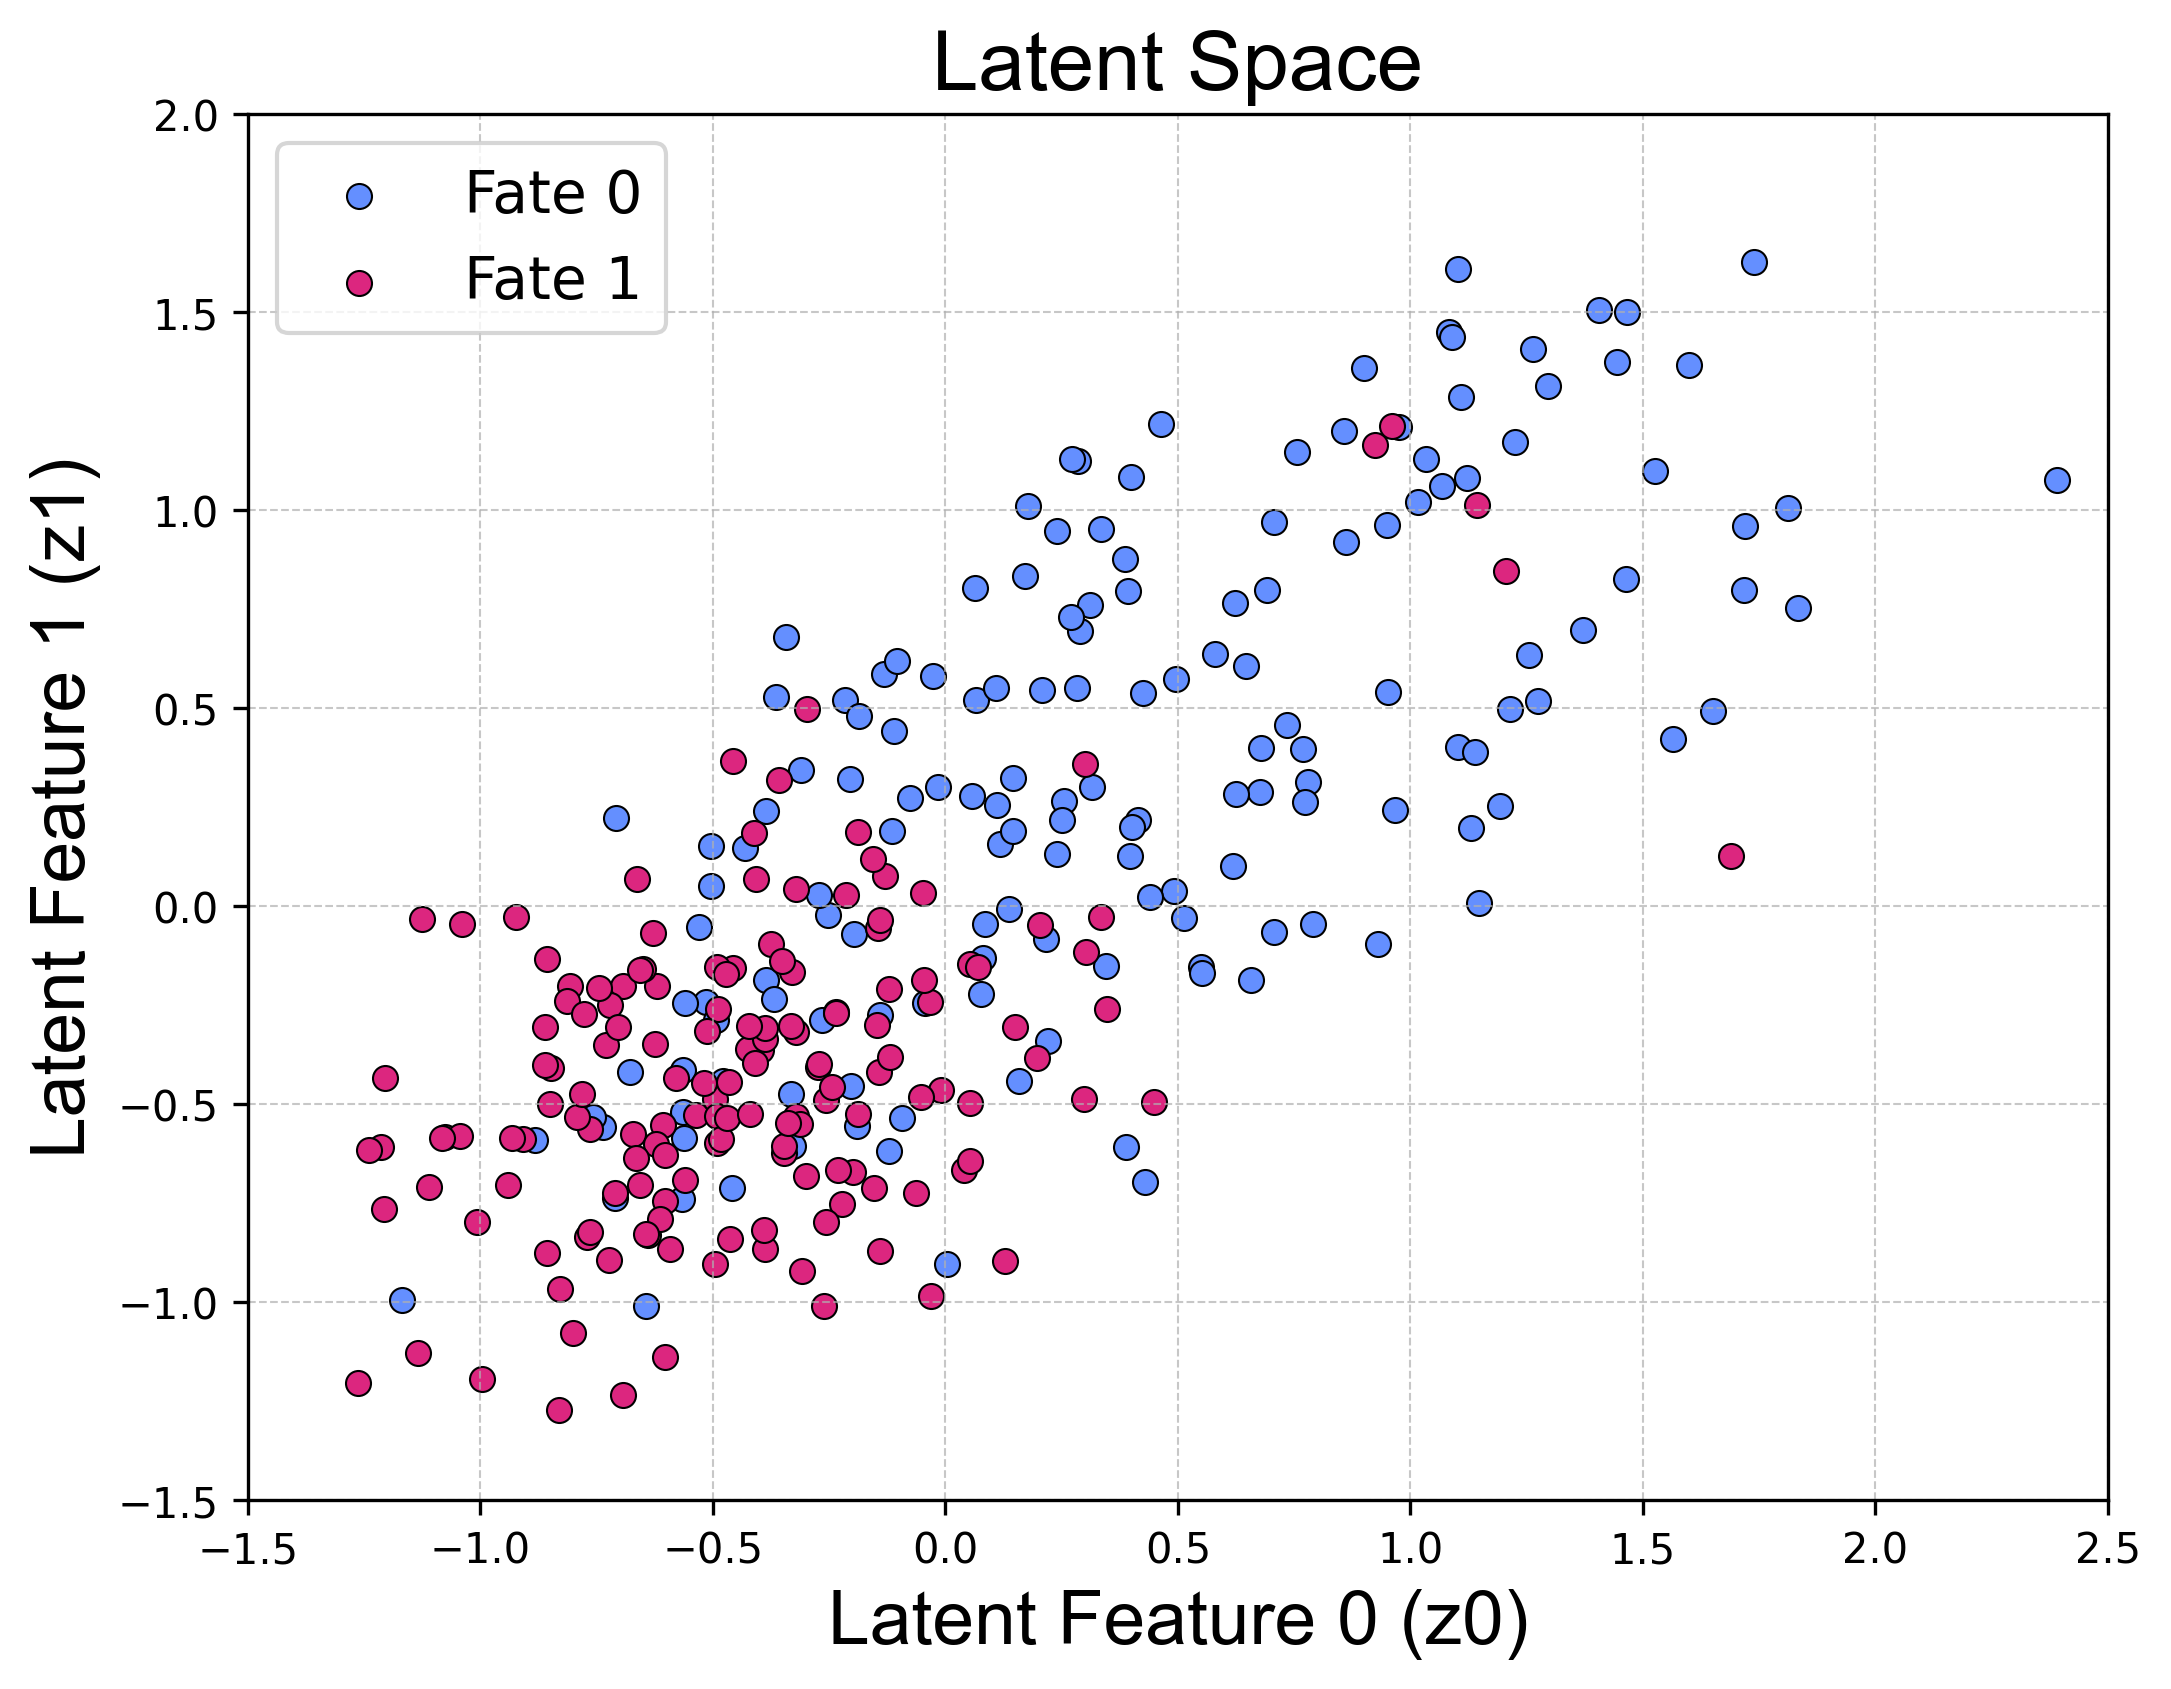

In [64]:
# Predict the latent representations
latent_2d = encoder.predict(augmented_x_train) 

# Find extreme points for axis limits
x_min, x_max = latent_2d[:, 0].min() - 0.5, latent_2d[:, 0].max() + 0.5
y_min, y_max = latent_2d[:, 1].min() - 0.5, latent_2d[:, 1].max() + 0.5

# Create the plot
plt.figure(figsize=(8, 6), dpi=300)

# Scatter plot for each class separately with thin gray edges
plt.scatter(latent_2d[augmented_y_train == 0][:, 0], latent_2d[augmented_y_train == 0][:, 1], 
            color='#648fff', label="Fate 0", alpha=1, edgecolors='k', linewidth=0.5, rasterized=True)  
plt.scatter(latent_2d[augmented_y_train == 1][:, 0], latent_2d[augmented_y_train == 1][:, 1], 
            color='#dc267f', label="Fate 1", alpha=1, edgecolors='k', linewidth=0.5, rasterized=True)  

# Set axis limits
plt.xlim(-1.5, 2.5)
plt.ylim(-1.5, 2)

# Increase font size and set Arial font
plt.xlabel("Latent Feature 0 (z0)", fontsize=18, fontname="Arial")
plt.ylabel("Latent Feature 1 (z1)", fontsize=18, fontname="Arial")
plt.title("Latent Space", fontsize=20, fontname="Arial")

# Legend and grid
plt.legend(fontsize=14)
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)

#plt.savefig("LS_20%data.eps", dpi=600, bbox_inches="tight")
plt.show()

## 60% train labels dataset (498 labels)

In [67]:
import sys
import os
sys.path.append(os.path.abspath("../..")) 
from src.models import Encoder, Decoder, Discriminator, mlp_classifier

config = {
    'batch_size': 30,
    'epochs': 50,
    'learning_rate': 0.001,
    'seed': 42,
    'latent_dim': 2,
    'GaussianNoise_std': 0.003,
    'lambda_recon': 5, 
    'lambda_adv': 0.05,
    'lambda_clf': 0.05,
    'lambda_cov': 0.1,
}

img_shape = (x_train.shape[1], x_train.shape[2], 1)
encoder = Encoder(img_shape=img_shape, latent_dim=config['latent_dim'], num_classes=2, gaussian_noise_std=config['GaussianNoise_std']).model
decoder = Decoder(latent_dim=config['latent_dim'], img_shape=img_shape, gaussian_noise_std=config['GaussianNoise_std']).model
discriminator = Discriminator(latent_dim=config['latent_dim']).model

encoder.load_weights("/Users/inescunha/Documents/GitHub/AI4CellFate/results/data_size_study0.6_s1_ep35_lr5_la1_seed42_ldim2_s2_lr6_la4_lc1_lcon8/models/encoder.weights.h5") ###TODO: change to the model path
#discriminator.load_weights("/Users/inescunha/Documents/GitHub/AI4CellFate/results/models/autoencoder_cov/discriminator.weights.h5") ###TODO: change to the model path

/Users/inescunha/anaconda3/envs/aicellfate/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/inescunha/anaconda3/envs/aicellfate/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


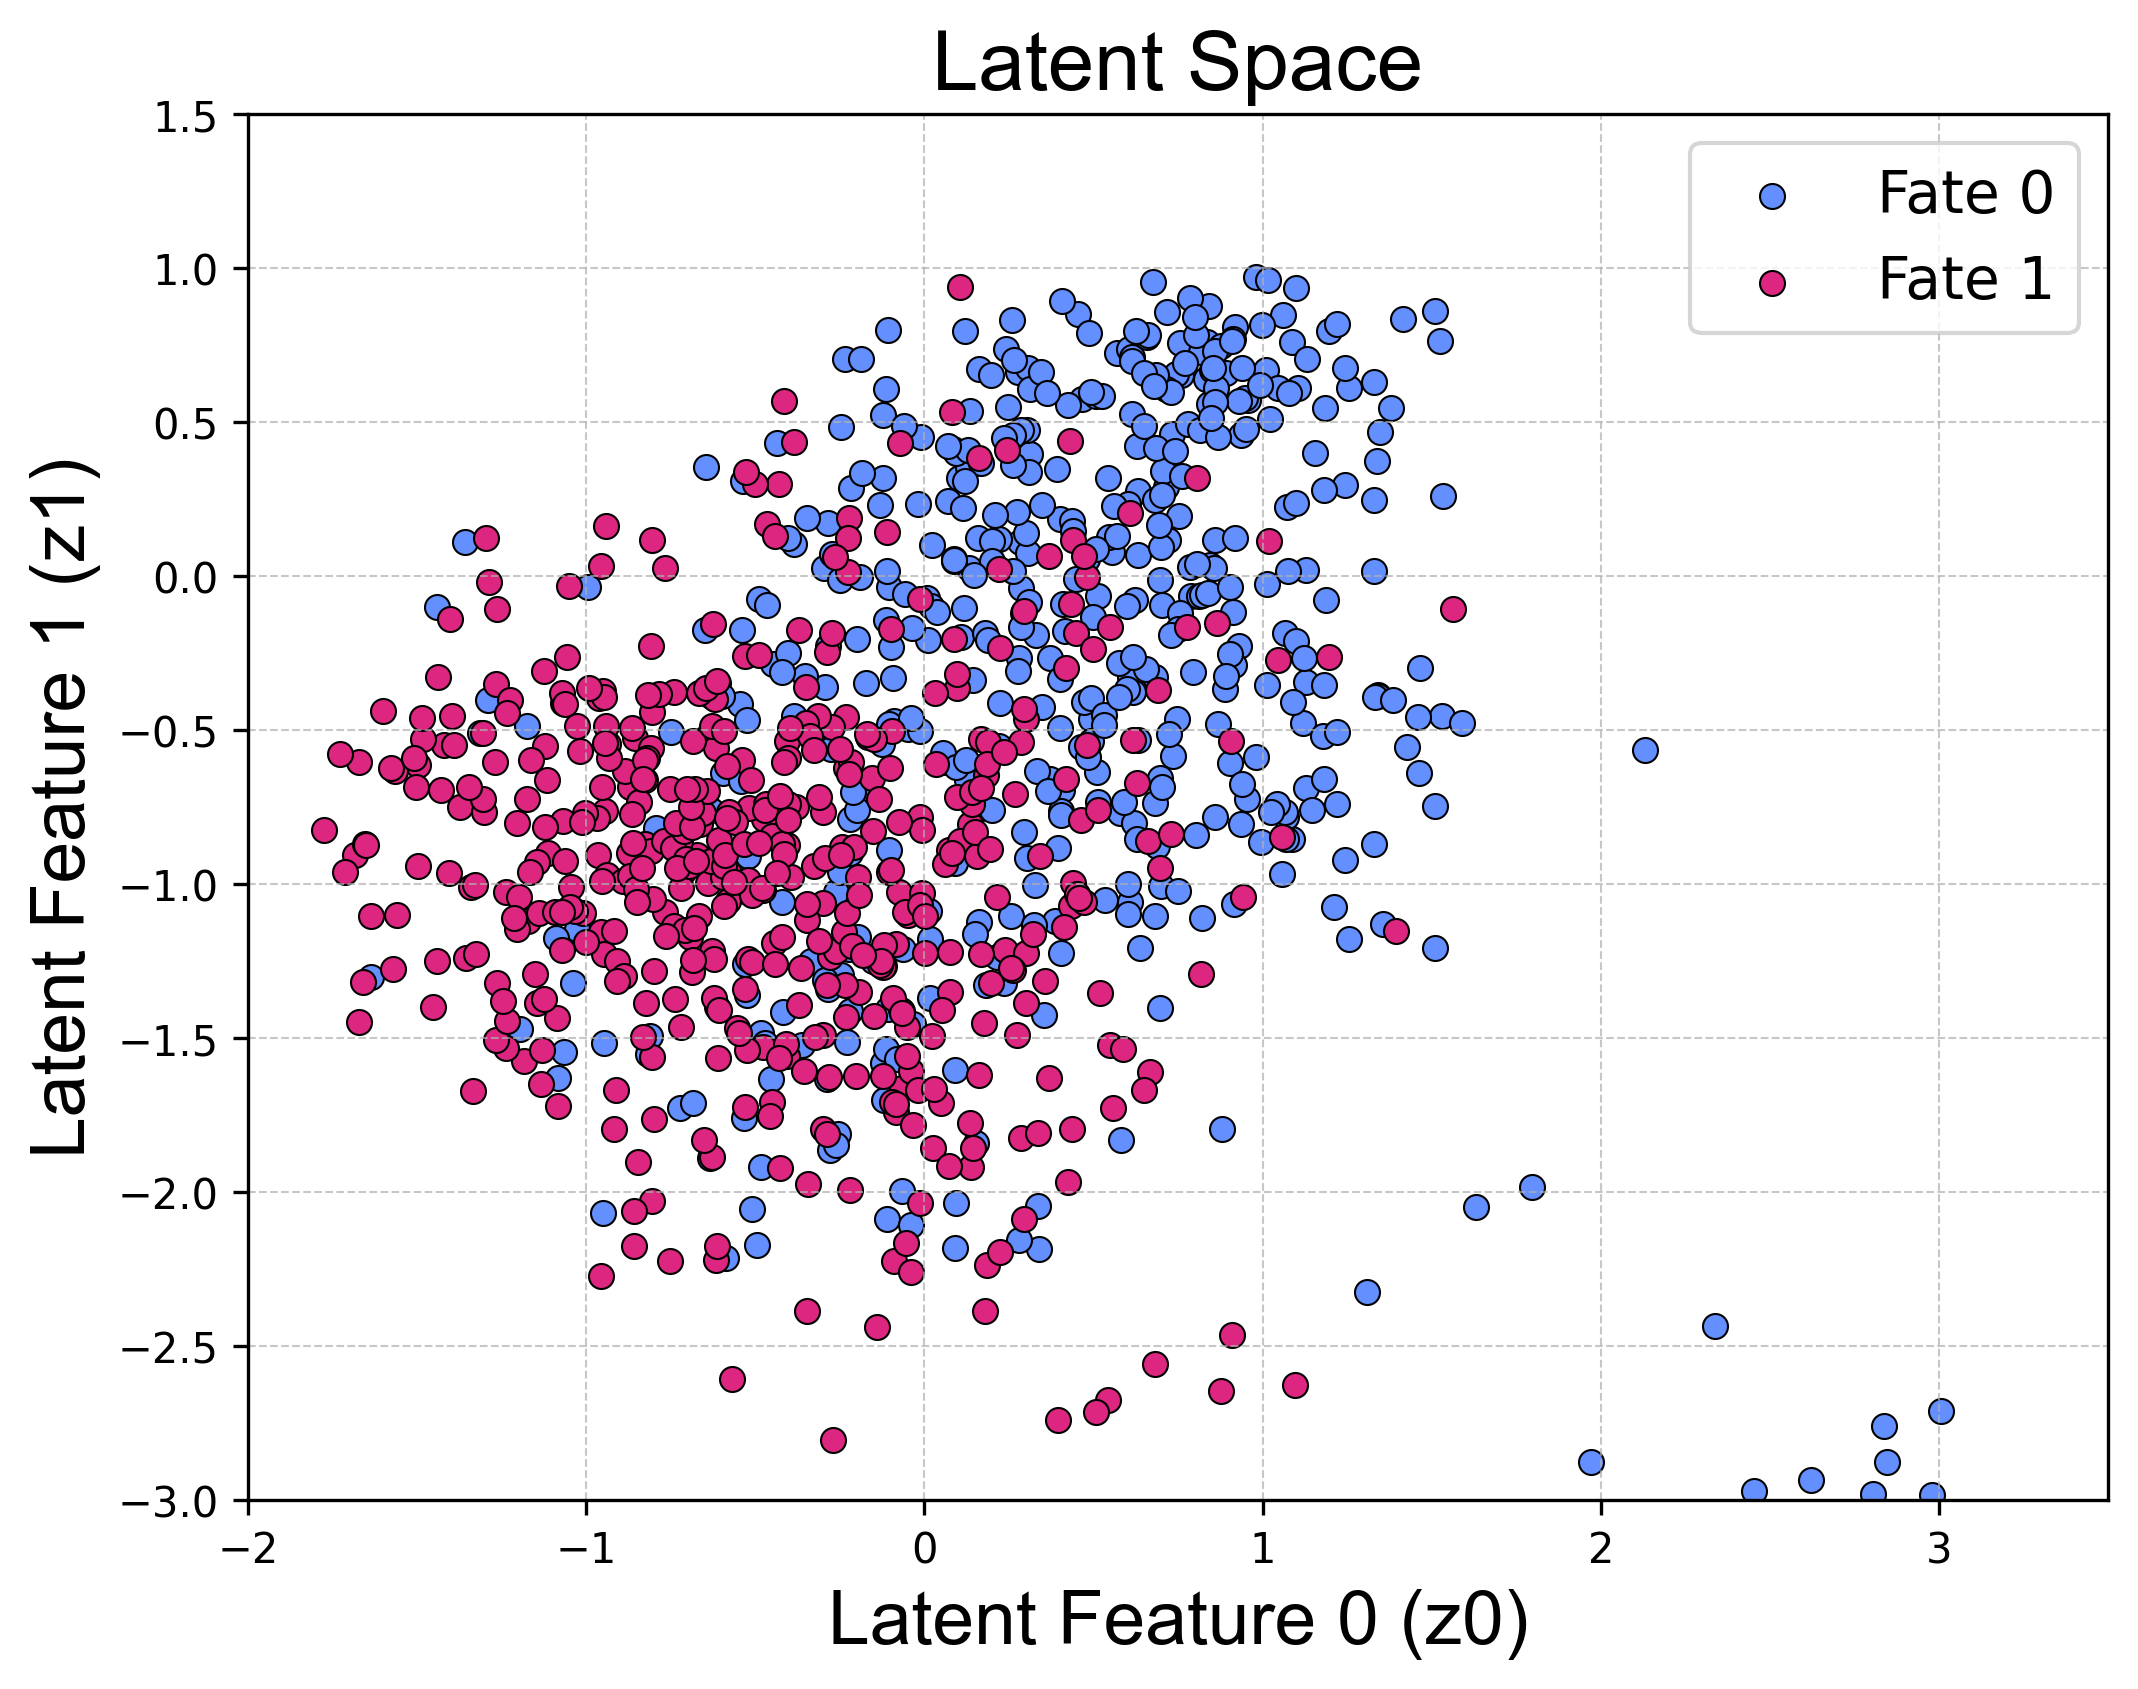

In [70]:
# Predict the latent representations
latent_2d = encoder.predict(augmented_x_train) 

# Find extreme points for axis limits
x_min, x_max = latent_2d[:, 0].min() - 0.5, latent_2d[:, 0].max() + 0.5
y_min, y_max = latent_2d[:, 1].min() - 0.5, latent_2d[:, 1].max() + 0.5

# Create the plot
plt.figure(figsize=(8, 6), dpi=300)

# Scatter plot for each class separately with thin gray edges
plt.scatter(latent_2d[augmented_y_train == 0][:, 0], latent_2d[augmented_y_train == 0][:, 1], 
            color='#648fff', label="Fate 0", alpha=1, edgecolors='k', linewidth=0.5, rasterized=True)  
plt.scatter(latent_2d[augmented_y_train == 1][:, 0], latent_2d[augmented_y_train == 1][:, 1], 
            color='#dc267f', label="Fate 1", alpha=1, edgecolors='k', linewidth=0.5, rasterized=True)  

# Set axis limits
plt.ylim(-3, 1.5)
plt.xlim(-2, 3.5)

# Increase font size and set Arial font
plt.xlabel("Latent Feature 0 (z0)", fontsize=18, fontname="Arial")
plt.ylabel("Latent Feature 1 (z1)", fontsize=18, fontname="Arial")
plt.title("Latent Space", fontsize=20, fontname="Arial")

# Legend and grid
plt.legend(fontsize=14)
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)

#plt.savefig("LS_20%data.eps", dpi=600, bbox_inches="tight")
plt.show()